In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date",parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Clean data by filtering out days when the page views were in the top 2.5% of the dataset 
# or bottom 2.5% of the dataset.
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

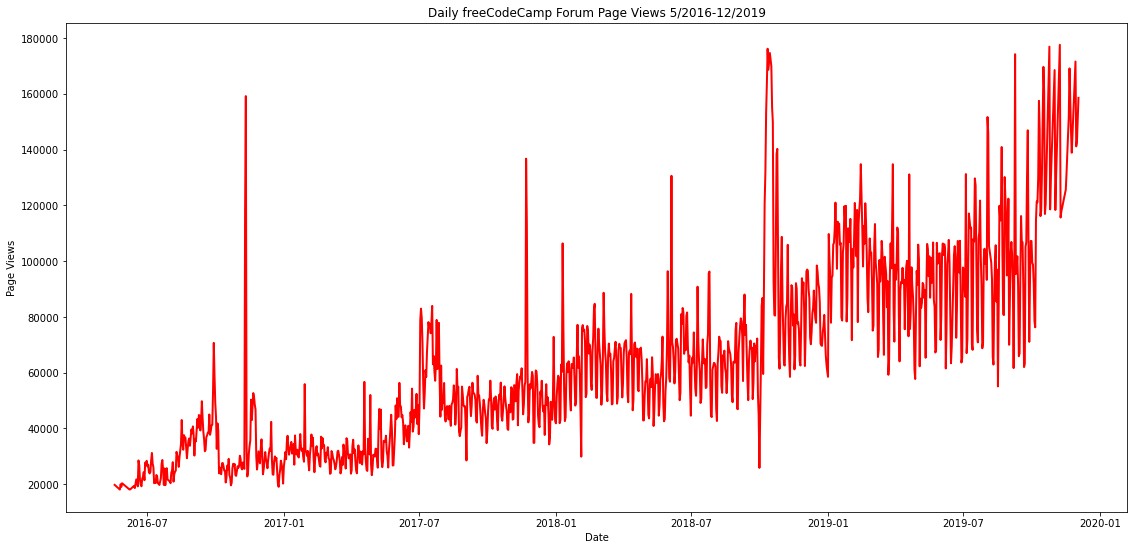

In [4]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to 
# "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views"
fig, ax = plt.subplots(figsize=(19,9))
ax.plot(df,color="red",linewidth=2)
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

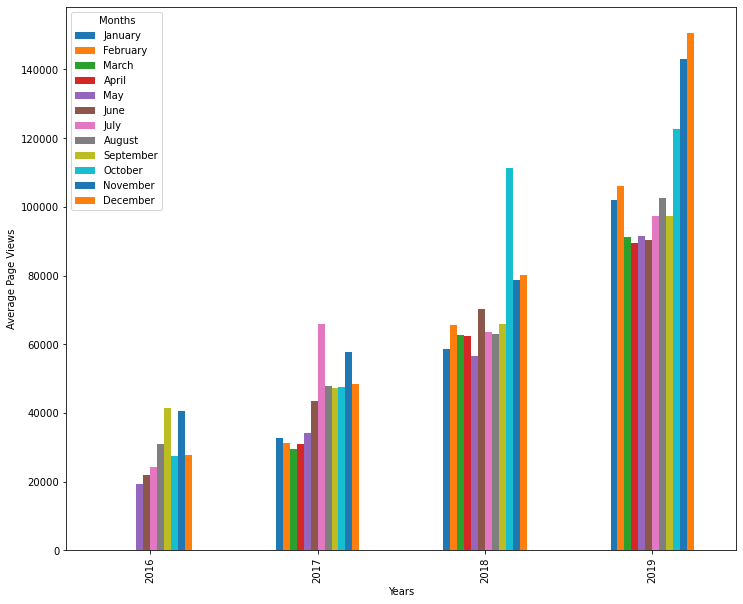

In [5]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. The legend should show month 
# labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the 
# label on the y axis should be "Average Page Views".

# Prepare data for bar plots (this part is done!)
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%b') for d in df_bar.date]
df_bar = df_bar.groupby(['year','month']).mean().reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar['month'] = df_bar['month'].apply(lambda x: datetime.strptime(x,'%b').strftime('%B'))
df_bar['month'] = pd.Categorical(df_bar['month'],categories=months)

df_bar = pd.pivot(df_bar,index='year',columns='month',values='value')
axes = df_bar.plot(kind='bar')
fig = axes.get_figure()
fig.set_size_inches(12,10)
axes.set_xlabel("Years")
axes.set_ylabel("Average Page Views")
axes.legend(title='Months')

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

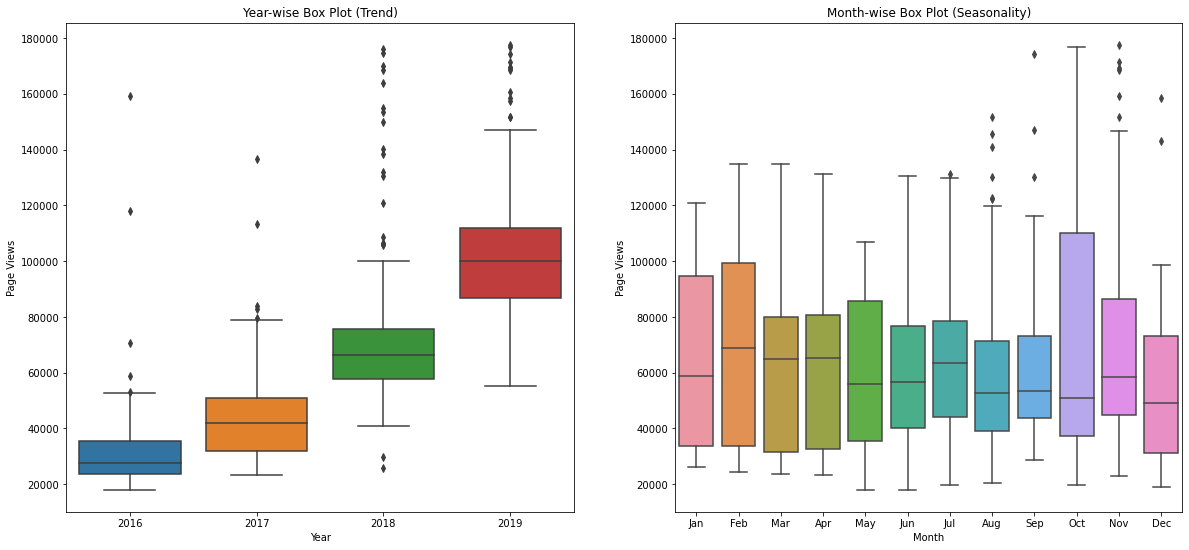

In [6]:
# Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to 
# "examples/Figure_3.png". These box plots should show how the values are distributed within a given year 
# or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot 
# (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the 
# month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
months_order = [datetime.strptime(str(month),'%m').strftime('%b') for month in range(1,13)]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,9))

sns.boxplot(x='year',y='value',data=df_box,ax=ax1)
ax1.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax1.set_title('Year-wise Box Plot (Trend)')

sns.boxplot(x='month',y='value',data=df_box,ax=ax2,order=months_order)
ax2.set_ylabel('Page Views')
ax2.set_xlabel('Month')
ax2.set_title('Month-wise Box Plot (Seasonality)')